[Используем DHCP-протокол](#Используем-DHCP-протокол)
[Динамическая маршрутизация](#Динамическая-маршрутизация)
[NAT](#NAT)
[Используем межсетевой экран](#Используем-межсетевой-экран)
[Настраиваем списки доступа](#Настраиваем-списки-доступа)
[Выделяем DMZ](#Выделяем-DMZ)
[Строим VPN](#Строим-VPN)
[Используем NTP сервер](#Используем-NTP-сервер)
[Используем SYSLOG сервер](#Используем-SYSLOG-сервер)
[Используем AAA сервер](#Используем-AAA-сервер)
[WiFi сети](#WiFi-сети)
[Траблшутинг](#Траблшутинг)
[Типовые схемы](#Типовые-схемы)

#### Используем DHCP-протокол
##### lesson11


```
Router(config)#int fa 0/0
Router(config-if)#no shutdown 
Router(config-if)#ip address 192.168.1.1 255.255.255.0
Router(config-if)#exit
Router(config)#ip dhcp pool DHCP
Router(dhcp-config)#network 192.168.1.0 255.255.255.0
Router(dhcp-config)#default-router 192.168.1.1
Router(dhcp-config)#dns-server 8.8.8.8
Router(config)#ip dhcp excluded-address 192.168.1.100
Router(config)#ip dhcp excluded-address 192.168.1.1
```

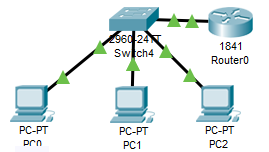

pc0, pc1, pc3 - dhcp

```
Switch(config)#vlan 2
Switch(config-vlan)#name VLAN2
Switch(config)#vlan 3
Switch(config-vlan)#name VLAN3
Switch(config)#vlan 4
Switch(config-vlan)#name DHCP
Switch(config)#int range fa 0/2-3
Switch(config-if-range)#switchport mode access 
Switch(config-if-range)#switchport access vlan 2
Switch(config)#interface range fa 0/4-5
Switch(config-if-range)#switchport mode access 
Switch(config-if-range)#switchport access vlan 3
Switch(config)#int fa 0/6
Switch(config-if)#switchport mode access 
Switch(config-if)#switchport access vlan 4
```

```
Switch(config-if)#int fa 0/1
Switch(config-if)#switchport mode trunk
Switch(config-if)#switchport trunk allowed vlan 2,3,4
```

```
Router#show ip dhcp binding 
IP address       Client-ID/              Lease expiration        Type
                 Hardware address
192.168.1.2      00E0.B020.16E5           --                     Automatic
192.168.1.3      0050.0FD0.5D35           --                     Automatic
192.168.1.4      000C.8564.8430           --                     Automatic
```

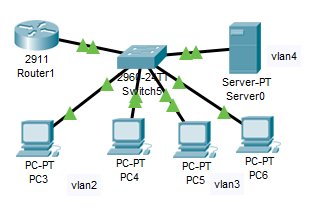

##### Router1
```
Router(config)#int gi 0/0.2
Router(config-subif)#encapsulation dot1Q 2
Router(config-subif)#ip address 192.168.2.1 255.255.255.0
Router(config-subif)#no shutdown 

Router(config)#int gi 0/0
Router(config-if)#no shutdown

Router(config)#int gi 0/0.3
Router(config-subif)#encapsulation dot1Q 3
Router(config-subif)#ip address 192.168.3.1 255.255.255.0
Router(config)#int gi 0/0.4
Router(config-subif)#encapsulation dot1Q 4
Router(config-subif)#ip address 192.168.4.1 255.255.255.0
```


##### Server0
```
192.168.4.2
Services DHCP
```

##### Router1
```
Router(config)#int gi 0/0.2
Router(config-subif)#ip helper-address 192.168.4.2
Router(config)#int gi 0/0.3
Router(config-subif)#ip helper-address 192.168.4.2
```

#### NAT
##### Lesson12
**PC0,PC1,PC3**
```
192.168.2.2,3,4
```
**Server0**
```
192.168.3.2
```
*Switch0*
```
Switch(config)#vlan 2
Switch(config-vlan)#name users
Switch(config)#vlan 3
Switch(config-vlan)#name server
Switch(config)#int fa0/2
Switch(config-if)#switchport mode access 
Switch(config-if)#switchport access vlan 3
Switch(config)#int fa0/3
Switch(config)#int range fa 0/3-5
Switch(config-if-range)#switchport mode access 
Switch(config-if-range)#switchport access vlan 2

Switch(config-if)#switchport mode trunk 
Switch(config-if)#switchport trunk allowed vlan 2,3

```

Router0
```
Router(config)#int fa 0/1
Router(config-if)#no shutdown 

Router(config)#int fa 0/1.2
Router(config-subif)#encapsulation dot1Q 2
Router(config-subif)#ip address 192.168.2.1 255.255.255.0
Router(config-subif)#no shutdown 

Router(config)#int fa 0/1.3
Router(config-subif)#encapsulation dot1Q 3
Router(config-subif)#ip address 192.168.3.1 255.255.255.0
Router(config-subif)#no shutdown 


```

**Router1**
```
Router(config)#int fa 0/0
Router(config-if)#ip address 213.234.10.1 255.255.255.252
Router(config-if)#no shutdown 

Router(config)#int fa 0/1
Router(config-if)#ip address 213.234.20.1 255.255.255.252
Router(config-if)#no shutdown 

```

**Server1**
```
213.234.20.2
```

**Router0**
```
Router(config)#int fa 0/0
Router(config-if)#ip address 213.234.10.2 255.255.255.252
Router(config-if)#no shutdown 

Router(config)#ip route 0.0.0.0 0.0.0.0 213.234.10.1

Router(config)#int fa 0/0
Router(config-if)#ip nat outside 
Router(config)#int fa 0/1.2
Router(config-subif)#ip nat inside 
Router(config)#int fa 0/1.3
Router(config-subif)#ip nat inside 

Router(config)#ip nat inside source list FOR-NAT interface fa 0/0 overload 

```
**Router(config)#ip nat inside source list FOR-NAT interface fa 0/0 overload 
**

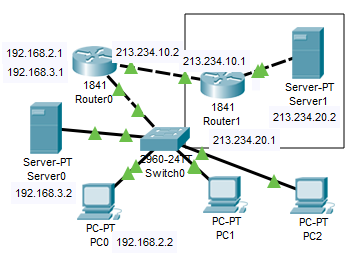

192.168.2.2 C:\>ping -n 200 213.234.20.2  
Reply from 213.234.20.2: bytes=32 time<1ms TTL=126  
```
Router#show ip nat translations 
Pro  Inside global     Inside local       Outside local      Outside global
icmp 213.234.10.2:360  192.168.2.2:360    213.234.20.2:360   213.234.20.2:360
icmp 213.234.10.2:361  192.168.2.2:361    213.234.20.2:361   213.234.20.2:361
icmp 213.234.10.2:362  192.168.2.2:362    213.234.20.2:362   213.234.20.2:362
icmp 213.234.10.2:363  192.168.2.2:363    213.234.20.2:363   213.234.20.2:363
icmp 213.234.10.2:364  192.168.2.2:364    213.234.20.2:364   213.234.20.2:364
icmp 213.234.10.2:365  192.168.2.2:365    213.234.20.2:365   213.234.20.2:365
```

##### Static NAT
**Server1**  
`http://213.234.10.2`  
Host Name Unresolved  

**Router0**  
Router(config)#ip nat inside source static tcp 192.168.3.2 80 213.234.10.2 80


```
http://213.234.10.2  

Cisco Packet Tracer
Welcome to Cisco Packet Tracer. Opening doors to new opportunities. Mind Wide Open.
Quick Links: 
A small page 
Copyrights 
Image page 
Image
```

#### Динамическая маршрутизация
##### Lesson13 OSPF
**PC1,PC2,PC3**  
192.168.1.0/24  
192.168.2.0/24  
192.168.3.0/24  


**Router1**  
```
interface GigabitEthernet0/0
 ip address 10.10.10.1 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/1
 ip address 10.10.11.1 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/2
 ip address 192.168.1.1 255.255.255.0
 duplex auto
 speed auto
```

**Router2**  
```
interface GigabitEthernet0/0
 ip address 10.10.10.2 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/1
 ip address 10.10.12.1 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/2
 ip address 192.168.2.1 255.255.255.0
 duplex auto
 speed auto
```

**Router3**  
```
interface GigabitEthernet0/0
 ip address 10.10.12.2 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/1
 ip address 10.10.11.2 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/2
 ip address 192.168.3.1 255.255.255.0
 duplex auto
 speed auto
```

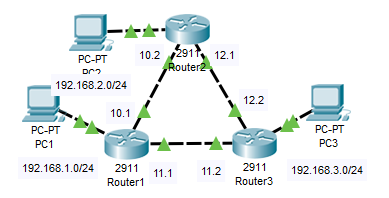

**Router1**  
```
Router(config)#int loopback 0
Router(config-if)#ip address 192.168.100.1 255.255.255.255

Router(config)#router ospf 1
Router(config-router)#network 192.168.1.0 0.0.0.255 area 0
Router(config-router)#network 10.10.10.0 0.0.0.3 area 0
Router(config-router)#network 10.10.11.0 0.0.0.3 area 0
```

**Router2**  
```
Router(config)#int loopback 0
Router(config-if)#ip address 192.168.100.2 255.255.255.255

Router(config)#router ospf 1
Router(config-router)#network 192.168.2.0 0.0.0.255 area 0
Router(config-router)#network 10.10.10.0 0.0.0.3 area 0
Router(config-router)#network 10.10.12.0 0.0.0.3 area 0
```

**Router3**  
```
Router(config)#int loopback 0
Router(config-if)#ip address 192.168.100.3 255.255.255.255
Router(config)#router ospf 1
Router(config-router)#network 192.168.3.0 0.0.0.255 area 0
Router(config-router)#network 10.10.11.0 0.0.0.3 area 0
Router(config-router)#network 10.10.12.0 0.0.0.3 area 0
```
```
interface Loopback0
 ip address 192.168.100.3 255.255.255.255
!
router ospf 1
 log-adjacency-changes
 network 192.168.3.0 0.0.0.255 area 0
 network 10.10.11.0 0.0.0.3 area 0
 network 10.10.12.0 0.0.0.3 area 0
```

**Router#show ip ospf neighbor**
```
Neighbor ID     Pri   State           Dead Time   Address         Interface
192.168.100.2     1   FULL/DR         00:00:37    10.10.12.1      GigabitEthernet0/0
192.168.100.1     1   FULL/BDR        00:00:35    10.10.11.1      GigabitEthernet0/1
```

**Router#show ip route**
```
Codes: L - local, C - connected, S - static, R - RIP, M - mobile, B - BGP
       D - EIGRP, EX - EIGRP external, O - OSPF, IA - OSPF inter area
       N1 - OSPF NSSA external type 1, N2 - OSPF NSSA external type 2
       E1 - OSPF external type 1, E2 - OSPF external type 2, E - EGP
       i - IS-IS, L1 - IS-IS level-1, L2 - IS-IS level-2, ia - IS-IS inter area
       * - candidate default, U - per-user static route, o - ODR
       P - periodic downloaded static route

Gateway of last resort is not set

     10.0.0.0/8 is variably subnetted, 5 subnets, 2 masks
O       10.10.10.0/30 [110/2] via 10.10.11.1, 00:33:09, GigabitEthernet0/1
                      [110/2] via 10.10.12.1, 00:33:09, GigabitEthernet0/0
C       10.10.11.0/30 is directly connected, GigabitEthernet0/1
L       10.10.11.2/32 is directly connected, GigabitEthernet0/1
C       10.10.12.0/30 is directly connected, GigabitEthernet0/0
L       10.10.12.2/32 is directly connected, GigabitEthernet0/0
O    192.168.1.0/24 [110/2] via 10.10.11.1, 00:33:29, GigabitEthernet0/1
O    192.168.2.0/24 [110/2] via 10.10.12.1, 00:33:09, GigabitEthernet0/0
     192.168.3.0/24 is variably subnetted, 2 subnets, 2 masks
C       192.168.3.0/24 is directly connected, GigabitEthernet0/2
L       192.168.3.1/32 is directly connected, GigabitEthernet0/2
     192.168.100.0/32 is subnetted, 1 subnets
C       192.168.100.3/32 is directly connected, Loopback0
```

**Router1**  
```
Router(config)#int gi 0/1
Router(config-if)#shutdown 
```
**Router3**  
```
Router#show ip route 
     10.0.0.0/8 is variably subnetted, 3 subnets, 2 masks
O       10.10.10.0/30 [110/2] via 10.10.12.1, 00:02:58, GigabitEthernet0/0
C       10.10.12.0/30 is directly connected, GigabitEthernet0/0
L       10.10.12.2/32 is directly connected, GigabitEthernet0/0
O    192.168.1.0/24 [110/3] via 10.10.12.1, 00:02:58, GigabitEthernet0/0
O    192.168.2.0/24 [110/2] via 10.10.12.1, 00:46:45, GigabitEthernet0/0
     192.168.3.0/24 is variably subnetted, 2 subnets, 2 masks
C       192.168.3.0/24 is directly connected, GigabitEthernet0/2
L       192.168.3.1/32 is directly connected, GigabitEthernet0/2
     192.168.100.0/32 is subnetted, 1 subnets
C       192.168.100.3/32 is directly connected, Loopback0
```
```
==================
O    192.168.1.0/24 [110/2] via 10.10.11.1, 00:33:29, GigabitEthernet0/1
O    192.168.2.0/24 [110/2] via 10.10.12.1, 00:33:09, GigabitEthernet0/0
==================
O    192.168.1.0/24 [110/3] via 10.10.12.1, 00:02:58, GigabitEthernet0/0
O    192.168.2.0/24 [110/2] via 10.10.12.1, 00:46:45, GigabitEthernet0/0
==================
```

**(Static routing)**  
```
PC0 C:\>ping -n 200 192.168.2.2
Reply from 192.168.1.1: Destination host unreachable.
```
**Router1**  
```
ip route 192.168.2.0 255.255.255.0 10.10.10.2
```
```
PC0 C:\>ping -n 200 192.168.2.2
Request timed out.
```
**Router2**  
```
ip route 192.168.1.0 255.255.255.0 10.10.10.1
```
```
PC0 C:\>ping -n 200 192.168.2.2
Reply from 192.168.2.2: bytes=32 time<1ms TTL=126
```

##### Example 2
**PC-PT VLAN10,20,30,40**
```
192.168.10.2
192.168.20.2
192.168.30.2
192.168.40.2
```
**Server-PT Server0**
```
210.214.2.2
255.255.255.252
210.214.2.1
```

**Switch1**
```
interface FastEthernet0/1
 switchport trunk allowed vlan 10,20
 switchport mode trunk
!
interface FastEthernet0/2
 switchport access vlan 10
 switchport mode access
!
interface FastEthernet0/3
 switchport access vlan 20
 switchport mode access
```

**Switch2**
```
interface FastEthernet0/1
 switchport trunk allowed vlan 30,40
 switchport mode trunk
!
interface FastEthernet0/2
 switchport access vlan 30
 switchport mode access
!
interface FastEthernet0/3
 switchport access vlan 40
 switchport mode access
```

**R1**
```
interface FastEthernet0/0
 ip address 192.168.1.2 255.255.255.252
 duplex auto
 speed auto
!
interface FastEthernet0/1
 no ip address
 duplex auto
 speed auto
!
interface FastEthernet0/1.10
 encapsulation dot1Q 10
 ip address 192.168.10.1 255.255.255.0
!
interface FastEthernet0/1.20
 encapsulation dot1Q 20
 ip address 192.168.20.1 255.255.255.0
```

**Switch2**
```
interface FastEthernet0/1
 switchport trunk allowed vlan 30,40
 switchport mode trunk
!
interface FastEthernet0/2
 switchport access vlan 30
 switchport mode access
!
interface FastEthernet0/3
 switchport access vlan 40
 switchport mode access
```

**R2**
```
interface FastEthernet0/0
 ip address 192.168.2.2 255.255.255.252
 duplex auto
 speed auto
!
interface FastEthernet0/1
 no ip address
 duplex auto
 speed auto
!
interface FastEthernet0/1.30
 encapsulation dot1Q 30
 ip address 192.168.30.1 255.255.255.0
!
interface FastEthernet0/1.40
 encapsulation dot1Q 40
 ip address 192.168.40.1 255.255.255.0
```

**R0**
```
interface GigabitEthernet0/0
 ip address 210.214.1.2 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/1
 ip address 192.168.1.1 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/2
 ip address 192.168.2.1 255.255.255.252
 duplex auto
 speed auto
```

**Router Internet**
```
interface GigabitEthernet0/0
 ip address 210.214.1.1 255.255.255.252
 duplex auto
 speed auto
!
interface GigabitEthernet0/1
 ip address 210.214.2.1 255.255.255.252
 duplex auto
 speed auto
```

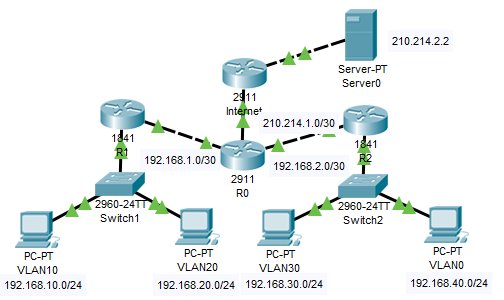

**R1**
(loopback 0, ospf 1, area 0)
```
interface Loopback0
 ip address 192.168.100.1 255.255.255.255
!
router ospf 1
 log-adjacency-changes
 network 192.168.10.0 0.0.0.255 area 0
 network 192.168.20.0 0.0.0.255 area 0
 network 192.168.1.0 0.0.0.3 area 0
```

**R2**
```
interface Loopback0
 ip address 192.168.100.2 255.255.255.255
!
router ospf 1
 log-adjacency-changes
 network 192.168.30.0 0.0.0.255 area 0
 network 192.168.40.0 0.0.0.255 area 0
 network 192.168.2.0 0.0.0.3 area 0
```

**R0**
```
interface Loopback0
 ip address 192.168.100.3 255.255.255.255
!
router ospf 1
 log-adjacency-changes
 network 192.168.1.0 0.0.0.3 area 0
 network 192.168.2.0 0.0.0.3 area 0
```
Router#show ip ospf neighbor 
```
Neighbor ID     Pri   State           Dead Time   Address         Interface
192.168.100.1     1   FULL/DR         00:00:32    192.168.1.2     GigabitEthernet0/1
192.168.100.2     1   FULL/DR         00:00:32    192.168.2.2     GigabitEthernet0/2
```
Router#sh ip route 
```
O    192.168.10.0/24 [110/2] via 192.168.1.2, 00:06:53, GigabitEthernet0/1
O    192.168.20.0/24 [110/2] via 192.168.1.2, 00:06:53, GigabitEthernet0/1
O    192.168.30.0/24 [110/2] via 192.168.2.2, 00:06:43, GigabitEthernet0/2
O    192.168.40.0/24 [110/2] via 192.168.2.2, 00:06:43, GigabitEthernet0/2
```

**R0 default gateway**
```
Router(config)#ip route 0.0.0.0 0.0.0.0 210.214.1.1
Router(config)#router ospf 1
Router(config-router)#default-information ?
  originate  Distribute a default route
Router(config-router)#default-information originate 
```

**R1**  
show ip route
```
O*E2 0.0.0.0/0 [110/1] via 192.168.1.1, 00:02:49, FastEthernet0/0```

**R0**  
nat
```
Router(config)#int gi 0/0
Router(config-if)#ip nat outside 
Router(config)#int gi 0/1
Router(config-if)#ip nat inside 
Router(config)#int gi 0/2
Router(config-if)#ip nat inside

Router(config)#ip access-list standard FOR-NAT 
Router(config-std-nacl)#permit 192.168.10.0 0.0.0.255 
Router(config-std-nacl)#permit 192.168.20.0 0.0.0.255 
Router(config-std-nacl)#permit 192.168.30.0 0.0.0.255 
Router(config-std-nacl)#permit 192.168.40.0 0.0.0.255 

Router(config)#ip nat inside source  list FOR-NAT interface gi 0/0 overload
```

Router#show ip nat translations 
```
Pro  Inside global     Inside local       Outside local      Outside global
icmp 210.214.1.2:1492  192.168.10.2:1492  210.214.2.2:1492   210.214.2.2:1492
icmp 210.214.1.2:1493  192.168.10.2:1493  210.214.2.2:1493   210.214.2.2:1493
```

#### Динамическая маршрутизация (EIGRP)
##### Lesson14

**Router(config)#no router ospf 1**
```

```

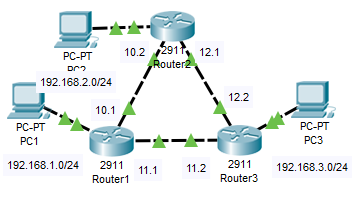

**Router1**
```
Router(config)#router eigrp 1
Router(config-router)#network 192.168.1.0 0.0.0.255 
Router(config-router)#network 10.10.10.0 0.0.0.3
Router(config-router)#network 10.10.11.0 0.0.0.3
Router(config-router)#no auto-summary 
```

**Router2**
```
Router(config)#router eigrp 1
Router(config-router)#network 192.168.2.0 0.0.0.255 
Router(config-router)#network 10.10.10.0 0.0.0.3
Router(config-router)#network 10.10.12.0 0.0.0.3
Router(config-router)#no auto-summary 
```

**Router3**
```
Router(config)#router eigrp 1
Router(config-router)#network 192.168.3.0 0.0.0.255
Router(config-router)#network 10.10.11.0 0.0.0.3
Router(config-router)#network 10.10.12.0 0.0.0.3
Router(config-router)#
%DUAL-5-NBRCHANGE: IP-EIGRP 1: Neighbor 10.10.12.1 (GigabitEthernet0/0) is up: new adjacency
Router(config-router)#no auto-summary 
```

**Router1**
```
router eigrp 1
 network 192.168.1.0
 network 10.10.10.0 0.0.0.3
 network 10.10.11.0 0.0.0.3
```
Router#show ip eigrp neighbors 
```
IP-EIGRP neighbors for process 1
H   Address         Interface      Hold Uptime    SRTT   RTO   Q   Seq
                                   (sec)          (ms)        Cnt  Num
0   10.10.10.2      Gig0/0         11   00:12:51  40     1000  0   11
1   10.10.11.2      Gig0/1         10   00:07:24  40     1000  0   13
```

D - EIGRP, EX - EIGRP external, O - OSPF, IA - OSPF inter area  
Router#show ip route 
```
Codes: L - local, C - connected, S - static, R - RIP, M - mobile, B - BGP
       D - EIGRP, EX - EIGRP external, O - OSPF, IA - OSPF inter area
       N1 - OSPF NSSA external type 1, N2 - OSPF NSSA external type 2
       E1 - OSPF external type 1, E2 - OSPF external type 2, E - EGP
       i - IS-IS, L1 - IS-IS level-1, L2 - IS-IS level-2, ia - IS-IS inter area
       * - candidate default, U - per-user static route, o - ODR
       P - periodic downloaded static route

Gateway of last resort is not set

     10.0.0.0/8 is variably subnetted, 5 subnets, 2 masks
C       10.10.10.0/30 is directly connected, GigabitEthernet0/0
L       10.10.10.1/32 is directly connected, GigabitEthernet0/0
C       10.10.11.0/30 is directly connected, GigabitEthernet0/1
L       10.10.11.1/32 is directly connected, GigabitEthernet0/1
D       10.10.12.0/30 [90/3072] via 10.10.10.2, 00:14:27, GigabitEthernet0/0
                      [90/3072] via 10.10.11.2, 00:09:23, GigabitEthernet0/1
     192.168.1.0/24 is variably subnetted, 2 subnets, 2 masks
C       192.168.1.0/24 is directly connected, GigabitEthernet0/2
L       192.168.1.1/32 is directly connected, GigabitEthernet0/2
D    192.168.2.0/24 [90/5376] via 10.10.10.2, 00:15:08, GigabitEthernet0/0
D    192.168.3.0/24 [90/5376] via 10.10.11.2, 00:09:42, GigabitEthernet0/1
     192.168.100.0/32 is subnetted, 1 subnets
C       192.168.100.1/32 is directly connected, Loopback0
```

Router(config)#int gi 0/1
Router(config-if)#shutdown 
```
Reply from 192.168.3.2: bytes=32 time<1ms TTL=126
Reply from 192.168.3.2: bytes=32 time=11ms TTL=125
Reply from 192.168.3.2: bytes=32 time=7ms TTL=125
Reply from 192.168.3.2: bytes=32 time<1ms TTL=125
```

**Router3**  
default routeing  
```
Router(config)#ip route 0.0.0.0 0.0.0.0 192.168.3.2
Router(config)#router eigrp 1
Router(config-router)#redistribute static 
```
**Router2**  
```
D*EX 0.0.0.0/0 [170/28416] via 10.10.12.2, 00:02:31, 
```

#### Настраиваем списки доступа
##### Lesson15 (Access List)

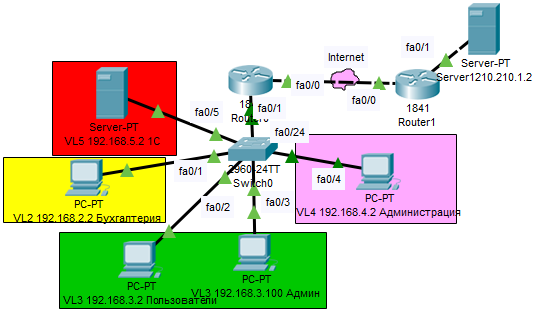

```
VL2 192.168.2.2 Бухгалтерия
VL5 192.168.3.2 Пользователи
VL3 192.168.3.100 Админ
VL4 192.168.4.2 Администрация
VL5 192.168.5.2 1C
Server1 210.210.1.2
```

**Switch0**
```
interface FastEthernet0/1
 switchport access vlan 2
 switchport mode access
!
interface FastEthernet0/2
 switchport access vlan 3
 switchport mode access
!
interface FastEthernet0/3
 switchport access vlan 3
 switchport mode access
!
interface FastEthernet0/4
 switchport access vlan 4
 switchport mode access
!
interface FastEthernet0/5
 switchport access vlan 5
 switchport mode access
!
interface FastEthernet0/24
 switchport trunk allowed vlan 2-5
 switchport mode trunk
```

**Router0**
```
interface FastEthernet0/0
 ip address 210.210.0.2 255.255.255.252
 duplex auto
 speed auto
!
interface FastEthernet0/1
 no ip address
 duplex auto
 speed auto
!
interface FastEthernet0/1.2
 description Buh
 encapsulation dot1Q 2
 ip address 192.168.2.1 255.255.255.0
!
interface FastEthernet0/1.3
 description Users
 encapsulation dot1Q 3
 ip address 192.168.3.1 255.255.255.0
!
interface FastEthernet0/1.4
 description Adm
 encapsulation dot1Q 4
 ip address 192.168.4.1 255.255.255.0
!
interface FastEthernet0/1.5
 description SRV
 encapsulation dot1Q 5
 ip address 192.168.5.1 255.255.255.0
!
interface Vlan1
 no ip address
 shutdown
!
ip classless
ip route 0.0.0.0 0.0.0.0 210.210.0.1 
```

**Router1**
```
interface FastEthernet0/0
 ip address 210.210.0.1 255.255.255.252
 duplex auto
 speed auto
!
interface FastEthernet0/1
 ip address 210.210.1.1 255.255.255.0
 duplex auto
 speed auto
!
```

*NAT*  
**Router0**
```
Router(config)#int fa 0/0
Router(config-if)#ip nat outside 

Router(config)#int fa 0/1.2
Router(config-subif)#ip nat inside 
Router(config-subif)#int fa 0/1.3
Router(config-subif)#ip nat inside 
Router(config-subif)#int fa 0/1.4
Router(config-subif)#ip nat inside 

Router(config)#ip access-list standard FOR-NAT
Router(config-std-nacl)#permit 192.168.2.0 0.0.0.255
Router(config-std-nacl)#permit 192.168.3.0 0.0.0.255
Router(config-std-nacl)#permit 192.168.4.0 0.0.0.255

Router(config)#ip nat inside source list FOR-NAT interface fa0/0
```

*show run*
```
ip nat inside source list FOR-NAT interface FastEthernet0/0 overload
ip classless
ip route 0.0.0.0 0.0.0.0 210.210.0.1 
!
ip flow-export version 9
!
!
ip access-list standard FOR-NAT
 permit 192.168.2.0 0.0.0.255
 permit 192.168.3.0 0.0.0.255
 permit 192.168.4.0 0.0.0.255
!
```

**
```
Router(config)#ip route 192.168.0.0 255.255.0.0 210.210.0.2


Router#ping 192.168.5.2
Sending 5, 100-byte ICMP Echos to 192.168.5.2, timeout is 2 seconds:
!!!!!
Success rate is 100 percent (5/5), round-trip min/avg/max = 0/0/2 ms


```

*Расширенный access list на входящий трафик*
**Router0**
```
Router(config)#ip access-list extended FROM-OUTSIDE
Router(config-ext-nacl)#deny ip any 192.168.2.0 0.0.0.255
Router(config-ext-nacl)#deny ip any 192.168.3.0 0.0.0.255
Router(config-ext-nacl)#deny ip any 192.168.4.0 0.0.0.255
Router(config-ext-nacl)#deny ip any 192.168.5.0 0.0.0.255
```
192.168.2.2 c:>ping 210.210.1.2  
timout  

**
```
Router(config)#ip access-list extended FROM-OUTSIDE
Router(config-ext-nacl)#permit ip any host 210.210.0.2
```
```
ip access-list standard FOR-NAT
 permit 192.168.2.0 0.0.0.255
 permit 192.168.3.0 0.0.0.255
 permit 192.168.4.0 0.0.0.255
ip access-list extended FROM-OUTSIDE
 deny ip any 192.168.2.0 0.0.0.255
 deny ip any 192.168.3.0 0.0.0.255
 deny ip any 192.168.4.0 0.0.0.255
 deny ip any 192.168.5.0 0.0.0.255
 permit ip any host 210.210.0.2
```

*extended access-list2*  
```
no ip access-list extended FROM-OUTSIDE

ip access-list standard FOR-NAT
 permit 192.168.2.0 0.0.0.255
 permit 192.168.3.0 0.0.0.255
 permit 192.168.4.0 0.0.0.255
ip access-list extended FROM-OUTSIDE
 permit ip any host 210.210.0.2
```

*telnet*  
```
Router(config)#username admin privilege 15 password 11111
Router(config)#enable password 11111
Router(config)#line vty 0 4
Router(config-line)#

  local           Local password checking
Router(config-line)#login Local 
*************************************
C:\>telnet 210.210.0.2
Trying 210.210.0.2 ...Open


User Access Verification

Username: admin
Password: 
Router#
```
*no telnet outside*
```

Router(config)#ip access-list extended FROM-OUTSIDE
Router(config-ext-nacl)#deny tcp any host 210.210.0.2 eq telnet 

ip access-list extended FROM-OUTSIDE
 permit ip any host 210.210.0.2
 deny tcp any host 210.210.0.2 eq telnet

```

*Проверка таблицы производится сверху*
```
Router(config)#no ip access-list extended FROM-OUTSIDE
Router(config)#ip access-list extended FROM-OUTSIDE
Router(config-ext-nacl)#deny tcp any host 210.210.0.2 eq telnet
Router(config-ext-nacl)#permit ip any host 210.210.0.2

ip access-list extended FROM-OUTSIDE
 deny tcp any host 210.210.0.2 eq telnet
 permit ip any host 210.210.0.2
 
 
 C:\>telnet 210.210.0.2
Trying 210.210.0.2 ...
% Connection timed out; remote host not responding
```

##### Доступ к VL5 192.168.5.2 1C только для VL2 192.168.2.2 Бухгалтерия
1. Создать 3 access-list:
разрешить VL2 192.168.2.2 Бухгалтерия
запретить 
VL3 192.168.3.100 Админ
VL4 192.168.4.2 Администрация
1. Создать 1 access-list:
разрешить VL5 192.168.5.2 1C для VL2 192.168.2.2 Бухгалтерия
**  
```
```

**  
```
Router(config)#ip access-list standard TO-1C
Router(config-std-nacl)#permit 192.168.2.0 0.0.0.255

Router(config-subif)#ip access-group TO-1C out 

```
```
ip access-list standard FOR-NAT
 permit 192.168.2.0 0.0.0.255
 permit 192.168.3.0 0.0.0.255
 permit 192.168.4.0 0.0.0.255
ip access-list extended FROM-OUTSIDE
 deny tcp any host 210.210.0.2 eq telnet
 permit ip any host 210.210.0.2
ip access-list standard TO-1C
 permit 192.168.2.0 0.0.0.255
```

*webserver*  
```
http://210.210.1.2
Cisco Packet Tracer
Welcome to HOME Packet Tracer. Opening doors to new opportunities. Mind Wide Open.
Quick Links: 
A small page 
Copyrights 
Image page 
Image
```

*ЗадачаN*  
`VL5 192.168.3.2 Пользователи` - http://210.210.1.2  
`VL3 192.168.3.100 Админ` - все протоколы  
*План*  
permit tcp 192.168.3.2 0.0.0.255 host 210.210.1.2 eq www  
permit ip host 192.168.3.100 host 210.210.1.2  
deny 192.168.3.2 0.0.0.255 host 210.210.1.2  
permit ip any any  
deny ip any any   
  

```
Router(config)#ip access-list extended FROM-USERS
Router(config-ext-nacl)#permit tcp 192.168.3.2 0.0.0.255 host 210.210.1.2 eq www
Router(config-ext-nacl)#permit ip host 192.168.3.100 host 210.210.1.2 
Router(config-ext-nacl)#deny ip 192.168.3.2 0.0.0.255  host 210.210.1.2
Router(config-ext-nacl)#permit ip any any 

Router(config)#int fa 0/1.3
Router(config-subif)#ip access-group FROM-USERS in 

```

*Домашнее задание*  
доступ администратору к 1С  
```
```

#### Используем межсетевой экран
##### Lesson16 ASA

```
CISCO SYSTEMS
Embedded BIOS Version 1.0(12)13 08/28/08 15:50:37.45

Low Memory: 632 KB
High Memory: 507 MB
PCI Device Table.
Bus Dev Func VendID DevID Class              Irq
 00  01  00   1022   2080  Host Bridge
 00  01  02   1022   2082  Chipset En/Decrypt 11
 00  0C  00   1148   4320  Ethernet           11
 00  0D  00   177D   0003  Network En/Decrypt 10
 00  0F  00   1022   2090  ISA Bridge
 00  0F  02   1022   2092  IDE Controller
 00  0F  03   1022   2093  Audio              10
 00  0F  04   1022   2094  Serial Bus         9
 00  0F  05   1022   2095  Serial Bus         9

Evaluating BIOS Options ...
Launch BIOS Extension to setup ROMMON

Cisco Systems ROMMON Version (1.0(12)13) #0: Thu Aug 28 15:55:27 PDT 2008

Platform ASA5505

Use BREAK or ESC to interrupt boot.
Use SPACE to begin boot immediately.

Boot in 9 seconds
Boot in 8 seconds
Boot in 7 seconds
Boot in 6 seconds
Boot in 5 seconds
Boot in 4 seconds
Boot in 3 seconds
Boot in 2 seconds
Boot in 1 second

Launching BootLoader...

Default configuration file contains 1 entry.

Searching / for images to boot.


Loading /asa842-k8.bin... Booting...
Platform ASA5505


Loading...
IO memory blocks requested from bigphys 32bit: 9672
dosfsck 2.11, 12 Mar 2005, FAT32, LFN
Starting check/repair pass.
Starting verification pass.
/dev/hda1: 152 files, 35584/62780 clusters
dosfsck(/dev/hda1) returned 0
Processor memory 348127232, Reserved memory: 62914560

Total SSMs found: 0

Total NICs found: 10
88E6095 rev 2 Gigabit Ethernet @ index 09 MAC: 0000.0003.0002
88E6095 rev 2 Ethernet @ index 08 MAC: 0010.115E.EE08
88E6095 rev 2 Ethernet @ index 07 MAC: 0010.115E.EE07
88E6095 rev 2 Ethernet @ index 06 MAC: 0010.115E.EE06
88E6095 rev 2 Ethernet @ index 05 MAC: 0010.115E.EE05
88E6095 rev 2 Ethernet @ index 04 MAC: 0010.115E.EE04
88E6095 rev 2 Ethernet @ index 03 MAC: 0010.115E.EE03
88E6095 rev 2 Ethernet @ index 02 MAC: 0010.115E.EE02
88E6095 rev 2 Ethernet @ index 01 MAC: 0010.115E.EE01
y88acs06 rev16 Gigabit Ethernet @ index 00 MAC: 44d3.caef.1e22
Encryption hardware device : Cisco ASA-5505 on-board accelerator (revision 0x0)
                             Boot microcode        : CN1000-MC-BOOT-2.00
                             SSL/IKE microcode     : CNLite-MC-SSLm-PLUS-2.03
                             IPSec microcode       : CNlite-MC-IPSECm-MAIN-2.06
Verify the activation-key, it might take a while...
Running Permanent Activation Key: 0xDA027529 0x5197AAE5 0x2339431A 0x88C5A22B 0x56122705

Licensed features for this platform:
Maximum Physical Interfaces       : 8              perpetual
VLANs                             : 3              DMZ Restricted
Dual ISPs                         : Disabled       perpetual
VLAN Trunk Ports                  : 0              perpetual
Inside Hosts                      : 10             perpetual
Failover                          : Disabled       perpetual
VPN-DES                           : Enabled        perpetual
VPN-3DES-AES                      : Enabled        perpetual
AnyConnect Premium Peers          : 2              perpetual
AnyConnect Essentials             : Disabled       perpetual
Other VPN Peers                   : 10             perpetual
Total VPN Peers                   : 25             perpetual
Shared License                    : Disabled       perpetual
AnyConnect for Mobile             : Disabled       perpetual
AnyConnect for Cisco VPN Phone    : Disabled       perpetual
Advanced Endpoint Assessment      : Disabled       perpetual
UC Phone Proxy Sessions           : 2              perpetual
Total UC Proxy Sessions           : 2              perpetual
Botnet Traffic Filter             : Disabled       perpetual
Intercompany Media Engine         : Disabled       perpetual

This platform has a Base license.


Cisco Adaptive Security Appliance Software Version 8.4(2)

  ****************************** Warning *******************************
  This product contains cryptographic features and is
  subject to United States and local country laws
  governing, import, export, transfer, and use.
  Delivery of Cisco cryptographic products does not
  imply third-party authority to import, export,
  distribute, or use encryption. Importers, exporters,
  distributors and users are responsible for compliance
  with U.S. and local country laws. By using this
  product you agree to comply with applicable laws and
  regulations. If you are unable to comply with U.S.
  and local laws, return the enclosed items immediately.

  A summary of U.S. laws governing Cisco cryptographic
  products may be found at:
  http://www.cisco.com/wwl/export/crypto/tool/stqrg.html

  If you require further assistance please contact us by
  sending email to export@cisco.com.
  ******************************* Warning *******************************

Copyright (c) 1996-2011 by Cisco Systems, Inc.

               Restricted Rights Legend

Use, duplication, or disclosure by the Government is
subject to restrictions as set forth in subparagraph
(c) of the Commercial Computer Software - Restricted
Rights clause at FAR sec. 52.227-19 and subparagraph
(c) (1) (ii) of the Rights in Technical Data and Computer
Software clause at DFARS sec. 252.227-7013.

               Cisco Systems, Inc.
               170 West Tasman Drive
               San Jose, California 95134-1706

Reading from flash...
!
Type help or '?' for a list of available commands.

ciscoasa>en
Password: 
ciscoasa#show ver
```

```
ciscoasa#show version 

Cisco Adaptive Security Appliance Software Version 8.4(2)
Device Manager Version 6.4(5)

Compiled on Wed 15-Jun-11 18:17 by mnguyen
System image file is "disk0:/asa842-k8.bin
Config file at boot was "startup-config"

ciscoasa up 3 minutes 36 seconds

Hardware:   ASA5505, 512 MB RAM, CPU Geode 500 MHz
Internal ATA Compact Flash, 128MB
BIOS Flash M50FW016 @ 0xfff00000, 2048KB

Encryption hardware device : Cisco ASA-5505 on-board accelerator (revision 0x0)
                             Boot microcode        : CN1000-MC-BOOT-2.00
                             SSL/IKE microcode     : CNLite-MC-SSLm-PLUS-2.03
                             IPSec microcode       : CNlite-MC-IPSECm-MAIN-2.06
                             Number of accelerators: 1

 0: Int: Internal-Data0/0    : address is 44d3.caef.1e22, irq 11
 1: Ext: Ethernet0/0         : address is 0010.115E.EE01, irq 255
 2: Ext: Ethernet0/1         : address is 0010.115E.EE02, irq 255
 3: Ext: Ethernet0/2         : address is 0010.115E.EE03, irq 255
 4: Ext: Ethernet0/3         : address is 0010.115E.EE04, irq 255
 5: Ext: Ethernet0/4         : address is 0010.115E.EE05, irq 255
 6: Ext: Ethernet0/5         : address is 0010.115E.EE06, irq 255
 7: Ext: Ethernet0/6         : address is 0010.115E.EE07, irq 255
 8: Ext: Ethernet0/7         : address is 0010.115E.EE08, irq 255
 9: Int: Internal-Data0/1    : address is 0000.0003.0002, irq 255
10: Int: Not used            : irq 255
11: Int: Not used            : irq 255

Licensed features for this platform:
Maximum Physical Interfaces       : 8              perpetual
VLANs                             : 3              DMZ Restricted
Dual ISPs                         : Disabled       perpetual
VLAN Trunk Ports                  : 0              perpetual
Inside Hosts                      : 10             perpetual
Failover                          : Disabled       perpetual
VPN-DES                           : Enabled        perpetual
VPN-3DES-AES                      : Enabled        perpetual
AnyConnect Premium Peers          : 2              perpetual
AnyConnect Essentials             : Disabled       perpetual
Other VPN Peers                   : 10             perpetual
Total VPN Peers                   : 25             perpetual
Shared License                    : Disabled       perpetual
AnyConnect for Mobile             : Disabled       perpetual
AnyConnect for Cisco VPN Phone    : Disabled       perpetual
Advanced Endpoint Assessment      : Disabled       perpetual
UC Phone Proxy Sessions           : 2              perpetual
Total UC Proxy Sessions           : 2              perpetual
Botnet Traffic Filter             : Disabled       perpetual
Intercompany Media Engine         : Disabled       perpetual

This platform has a Base license.

Serial Number: JMX1536A1P2-
Running Permanent Activation Key: 0xDA027529 0x5197AAE5 0x2339431A 0x88C5A22B 0x56122705
Configuration register is 0x1
Configuration has not been modified since last system restart.
```

*show run*
```
interface Ethernet0/0
 switchport access vlan 2
!
interface Ethernet0/1
!
interface Vlan1
 nameif inside
 security-level 100
 ip address 192.168.1.1 255.255.255.0
!
interface Vlan2
 nameif outside
 security-level 0
 ip address dhcp

dhcpd address 192.168.1.5-192.168.1.36 inside
dhcpd enable inside
```

*для удаленного управления*
```
ciscoasa(config)#enable password 11111
ciscoasa(config)#username admin password 11111
```
show run  
```
hostname ciscoasa
enable password EFzzo5IyMu79G/7u encrypted
names
username admin password EFzzo5IyMu79G/7u encrypted
```
(Sw,Routers)  
service password enciption  
do show run  
```
ciscoasa(config)#ssh 192.168.1.0 255.255.255.0 inside 
ciscoasa(config)#aaa authentication ssh console LOCAL 
ciscoasa(config)#show run
```

*ssh*
```
C:\>ssh -l admin 192.168.1.1

Password: 



ciscoasa>en
Password: 
ciscoasa#```

*Настройка security level*  
100 - внутренний  уровень доверия   
0 - внешний  
по умолчанию разрешен трафик с большего на меньший level  
```
ciscoasa(config)#int vlan 1
ciscoasa(config-if)#security-level 95
```

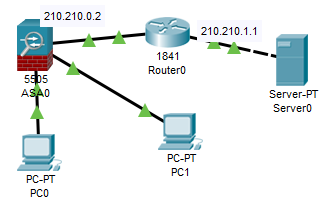

**
```
ciscoasa(config-if)#ip address 210.210.0.2 255.255.255.252
```

**
```
Router(config)#int fa 0/0
Router(config-if)#no shutdown 
Router(config-if)#ip address 210.210.0.1 255.255.255.252
Router(config-if)#int fa 0/1
Router(config-if)#no shutdown 
Router(config-if)#ip address 210.210.1.1 255.255.255.0
```

**
```
ciscoasa(config)#route outside 0.0.0.0 0.0.0.0 210.210.0.1

ciscoasa(config)#ping 210.210.1.2
!!!!!
```

**
```
Router(config)#ip route 192.168.1.0 255.255.255.0 210.210.0.2
```

*настройка инспектирования трафика*
```
class-map inspection_default
match default-inspection-traffic

policy-map global_policy
class inspection_default
inspect icmp

service-policy global_policy global

```
```
C:\>ping 210.210.0.1
C:\>ping 210.210.1.2
```

*http://210.210.1.2*
```
match default-inspection-traffic

policy-map global_policy
class inspection_default
inspect http
```

*nat*
```
Router(config)#no ip route 192.168.1.0 255.255.255.0 210.210.0.2


object network FOR-NAT
subnet 192.168.1.0 255.255.255.0
nat (inside,outside) dynamic interface

sho nat
```

#### Выделяем DMZ


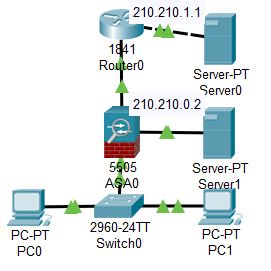

**
```
Server1 210.210.3.2 255.255.255.252 210.210.3.1
Router(config)#ip route 210.210.3.0 255.255.255.252 210.210.0.2
```

**
```
ciscoasa(config)#int eth 0/2
ciscoasa(config-if)#switchport access vlan 3

ciscoasa(config)#int vlan 3
ciscoasa(config-if)#name dmz
ERROR: This license does not allow configuring more than 2 interfaces with nameif and without a "no forward" command on this interface or on 1 interface(s) with nameif already configured.
ciscoasa(config-if)#no forward interface vlan 1
ciscoasa(config-if)#name dmz
INFO: Security level for "dmz" set to 0 by default.
ciscoasa(config-if)#sec
ciscoasa(config-if)#security-level 50
ciscoasa(config-if)#ip address 210.210.3.1 255.255.255.252

ciscoasa(config)#ping 210.210.3.2
```

**
```
ciscoasa(config)#access-list FROM-OUTSIDE extended permit icmp any host 210.210.3.2
ciscoasa(config)#access-list FROM-OUTSIDE extended permit tcp any host 210.210.3.2 eq www

ciscoasa(config)#access-group FROM-OUTSIDE in interface outside 

210.210.1.2 C:\>ping 210.210.3.2
210.210.1.2 http://210.210.3.2
```

**
```
192.168.1.2 C:\>ping 210.210.3.2
```
`Request timed out.` - ciscoasa(config-if)#no forward interface vlan 1   
```
```



#### С помощью маршрутизатора
**
```
Router1 2811 Physical add power off NM-1F3-TX power on

Router(config)#int fa 0/0
Router(config-if)#description outside
Router(config-if)#ip address 210.210.0.2 255.255.255.252
Router(config-if)#no shutdown 
Router(config-if)#ip nat outside 

Router(config-if)#int fa 0/1
Router(config-if)#description dmz
Router(config-if)#ip address 210.210.3.1 255.255.255.252
Router(config-if)#no shutdown

Router(config-if)#int fa 1/0
Router(config-if)#description inside
Router(config-if)#ip address 192.168.1.1 255.255.255.0
Router(config-if)#no shutdown 
Router(config-if)#ip nat inside 


```

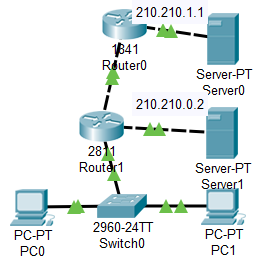

**
```
Router(config)#ip access-list standard FOR-NAT
Router(config-std-nacl)#permit 192.168.1.0 0.0.0.255
Router(config)#ip nat inside source list FOR-NAT interface fa0/0 overload 
Router(config)#ip route 0.0.0.0 0.0.0.0 210.210.0.1

```

**
```
```

#### Строим VPN
#### Используем NTP сервер
#### Используем SYSLOG сервер
#### Используем AAA сервер
#### WiFi сети
#### Траблшутинг
#### Типовые схемы

[Download Packet Tracer](https://www.netacad.com/portal/resources/packet-tracer)  
[]()  
[]()  
[]()  
[]()  
[]()  
